In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2200779\AppData\local\Temp\ipykernel_12752\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [10]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\e2200779\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [12]:
# Répertoire cible dans votre projet
project_dir = r"h:\Mes documents\SD3\S6\SAE 6-01\projet_SAE"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"C:\Users\e2200779\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1\ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'h:\\Mes documents\\SD3\\S6\\SAE 6-01\\projet_SAE\\ds_salaries.csv'

In [13]:
# Lire le fichier depuis le répertoire du projet
data = pd.read_csv("ds_salaries.csv")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [14]:
##### Données manquantes 
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


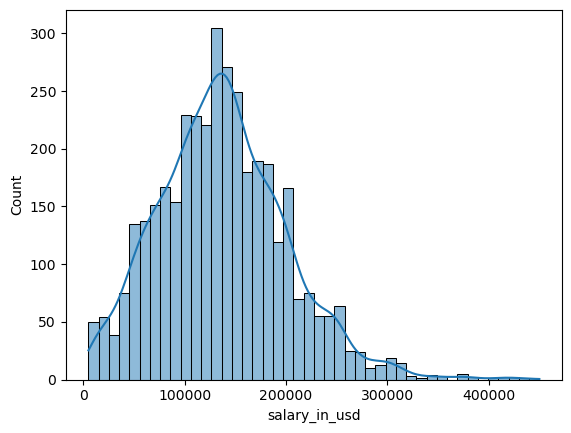

In [15]:
##### Distribution des salaires en USD
sns.histplot(data, x="salary_in_usd", kde=True)
plt.show()

In [18]:
##### liste des pays concerné par l'étude 
print(data.company_location.unique())     

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [21]:
# Salaire moyen par rôle
print(data.groupby("job_title")["salary_in_usd"].mean())

##### Salaire moyen par pays
print(data.groupby("employee_residence")["salary_in_usd"].mean())

##### Salaire moyen par niveau d'expérience
print(data.groupby("experience_level")["salary_in_usd"].mean())



job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64
employee_residence
AE    100000.000000
AM     50000.000000
AR     35500.000000
AS     32777.500000
AT     71125.833333
          ...      
TR     19058.000000
UA     57850.000000
US    152822.011651
UZ    103000.000000
VN     33466.666667
Name: salary_in_usd, Length: 78, dtype: float64
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [23]:
##### Filtrer les salaires pour un pays donné (ex : US)
salaries_us = data[data["employee_residence"] == "US"]
print(salaries_us)

      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence 

In [25]:
##### Top 5 des entreprises qui paient le plus
top_companies = (
    data.groupby("company_location")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print(top_companies)


company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64


In [27]:
##### Rôles avec un salaire moyen supérieur à 100,000

# Calculer le salaire moyen par rôle
roles_salary = data.groupby("job_title")["salary_in_usd"].mean()

# Filtrer les rôles dont le salaire moyen est supérieur à 100,000 USD
roles_above_100k = roles_salary[roles_salary > 100000]
print(roles_above_100k)

##### Pays avec la plus forte proportion de télétravail (remote_ratio = 100)

# Filtrer les employés travaillant à distance à 100%
remote_work = data[data["remote_ratio"] == 100]

# Calculer la proportion de télétravail par pays
remote_work_by_country = remote_work["employee_residence"].value_counts()

# Calculer le nombre total d'employés par pays
total_employees_by_country = data["employee_residence"].value_counts()

# Calculer la proportion de télétravail pour chaque pays
remote_proportion_by_country = remote_work_by_country / total_employees_by_country

# Trouver le pays avec la plus forte proportion de télétravail
top_remote_country = remote_proportion_by_country.idxmax()
top_remote_proportion = remote_proportion_by_country.max()

print(f"Le pays avec la plus forte proportion de télétravail est : {top_remote_country} avec une proportion de {top_remote_proportion:.2%}")


job_title
AI Developer                                136666.090909
AI Scientist                                110120.875000
Analytics Engineer                          152368.631068
Applied Data Scientist                      113726.300000
Applied Machine Learning Scientist          109452.833333
Applied Scientist                           190264.482759
BI Analyst                                  104888.888889
BI Developer                                129846.153846
Big Data Architect                          125802.500000
Business Intelligence Engineer              174150.000000
Cloud Data Architect                        250000.000000
Cloud Database Engineer                     155000.000000
Computer Vision Engineer                    143536.111111
Data Analyst                                108716.227124
Data Analytics Lead                         211254.500000
Data Analytics Manager                      141879.090909
Data Architect                              161713.772277
Data

In [28]:
##### Requêtes conditionnelles
##### Salaire moyen des employés à distance (100%)

# Filtrer les employés travaillant à distance à 100%
remote_employees = data[data["remote_ratio"] == 100]

# Calculer le salaire moyen des employés à distance
average_salary_remote = remote_employees["salary_in_usd"].mean()
print(f"Salaire moyen des employés à distance (100%) : {average_salary_remote:.2f} USD")

###### Comparer salaires moyens pour deux catégories

# Comparer les salaires moyens pour les employés à distance et ceux sans télétravail à 100%
remote_employees_100 = data[data["remote_ratio"] == 100]
remote_employees_less_than_100 = data[data["remote_ratio"] < 100]

# Calculer les salaires moyens
average_salary_remote_100 = remote_employees_100["salary_in_usd"].mean()
average_salary_remote_less_than_100 = remote_employees_less_than_100["salary_in_usd"].mean()

print(f"Salaire moyen des employés à distance (100%) : {average_salary_remote_100:.2f} USD")
print(f"Salaire moyen des employés sans télétravail à 100% : {average_salary_remote_less_than_100:.2f} USD")



Salaire moyen des employés à distance (100%) : 136481.45 USD
Salaire moyen des employés à distance (100%) : 136481.45 USD
Salaire moyen des employés sans télétravail à 100% : 138417.51 USD


In [29]:
##### Ajouter une colonne pour les fourchettes de salaires

# Définir des bornes pour les fourchettes de salaires
bins = [0, 50000, 100000, 150000, float('inf')]  # Les limites des fourchettes
labels = ['Moins de 50 000 USD', '50 000 - 100 000 USD', '100 000 - 150 000 USD', 'Plus de 150 000 USD']  # Les étiquettes des fourchettes

# Ajouter une colonne "salary_range" en utilisant pd.cut
data["salary_range"] = pd.cut(data["salary_in_usd"], bins=bins, labels=labels, right=False)

# Afficher les premières lignes pour vérifier
print(data[["job_title", "salary_in_usd", "salary_range"]].head())



                  job_title  salary_in_usd           salary_range
0  Principal Data Scientist          85847   50 000 - 100 000 USD
1               ML Engineer          30000    Moins de 50 000 USD
2               ML Engineer          25500    Moins de 50 000 USD
3            Data Scientist         175000    Plus de 150 000 USD
4            Data Scientist         120000  100 000 - 150 000 USD


In [33]:
##### Analyse des corrélations
##### Relation entre télétravail et salaire

# Calculer la corrélation entre remote_ratio et salary_in_usd
correlation = data[["remote_ratio", "salary_in_usd"]].corr()

print("Corrélation entre télétravail et salaire :")
print(correlation)
print("")
print("la corrélation est proche de 0, cela signifie qu'il n'y a pas de relation linéaire entre les deux.")

Corrélation entre télétravail et salaire :
               remote_ratio  salary_in_usd
remote_ratio       1.000000      -0.064171
salary_in_usd     -0.064171       1.000000

la corrélation est proche de 0, cela signifie qu'il n'y a pas de relation linéaire entre les deux.


In [34]:
##### Salaire moyen par taille d'entreprise

# Calculer le salaire moyen par taille d'entreprise
salary_by_company_size = data.groupby("company_size")["salary_in_usd"].mean()

# Afficher les résultats
print(salary_by_company_size)


company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


In [35]:
##### Tableaux croisés
##### Moyenne des salaires par niveau d'expérience et télétravail

# Créer un tableau croisé des salaires par niveau d'expérience et télétravail
pivot_table = data.pivot_table(
    index='experience_level',  # Niveau d'expérience
    columns='remote_ratio',    # Proportion de télétravail
    values='salary_in_usd',    # Les valeurs sont les salaires
    aggfunc='mean'             # Calculer la moyenne des salaires
)

# Afficher le tableau croisé
print("Tableau croisé des salaires par niveau d'expérience et télétravail :")
print(pivot_table)


Tableau croisé des salaires par niveau d'expérience et télétravail :
remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
